In [94]:
import pandas as pd
from IPython.display import display, HTML
%load_ext autoreload
%autoreload 2

TICKER = 'ARKK'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
# !pip install tqdm
# from tqdm import tqdm
# import time
# from tqdm.notebook import tqdm_notebook

[*********************100%***********************]  1 of 1 completed


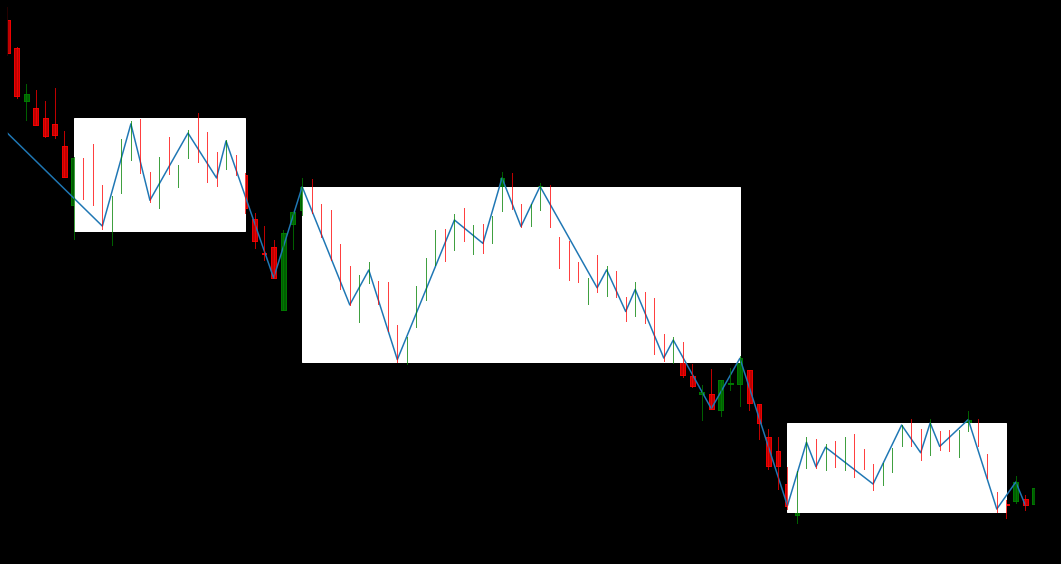

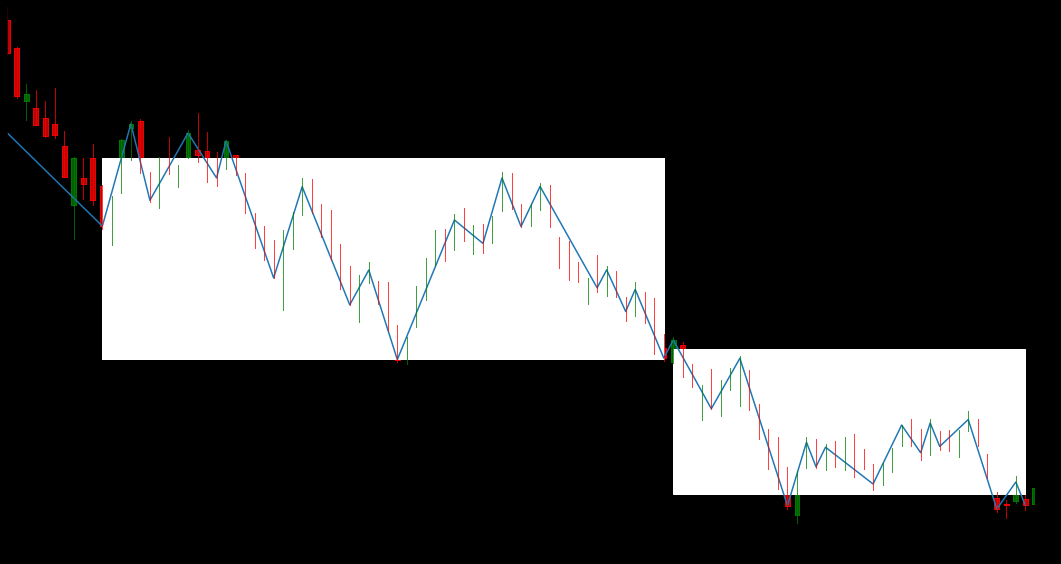

In [96]:
%matplotlib inline
from sr_cli import run
class Args:
    no_sr_lines = False
    ticker=TICKER
    period='5y'
    interval='1d'
    start_date='2021-11-01'
    stop_date='2022-06-18'
    dif=10.0
    retracement_size=5
    no_candles=False
    draw_boxes=True
    number=2
    empty_boxes=False
    sample_only=False
    show_zags=True
    min=10
    optimize=False
    time=365
    verbose=False

args=Args()
run(args)

In [ ]:
from sr_cli import run
class Args:
    no_sr_lines = False
    ticker=TICKER
    period='5y'
    interval='1d'
    start_date='2021-11-01'
    stop_date='2022-06-18'
    retracement_size=5
    dif=10.0
    no_candles=False
    draw_boxes=True
    empty_boxes=False
    sample_only=False
    show_zags=False
    min=10
    optimize=True
    time=365
    verbose=False

args=Args()
run(args)

[*********************100%***********************]  1 of 1 completed


  0%|          | 0/580 [00:00<?, ?it/s]

In [ ]:
df = pd.read_csv('data/samples.csv')
df = df[df.symbol == args.ticker]
from IPython.display import Image, display    
display(Image(f'data/samples/{args.ticker}.png', height=400, width=550))

In [ ]:
df.loc[:, 'img'] = df.outfile.apply(lambda x: f'<img height=400 width=800 src="{x}" alt="img">')
display(HTML("<style>div.output_scroll { height: 50em; }</style>"))
sortdf = df[['dif', 'ret', 'err', 'img']].sort_values(by=['err'])
# sortdf = sortdf[(sortdf.dif >= 10.0) & (sortdf.ret == 5.0)]
sortdf = sortdf[sortdf.err < 30]
display(HTML(sortdf.to_html(index=False, escape=False)))